In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

In [53]:
df=pd.read_csv('CreditScore.csv')

In [54]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [55]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [57]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [58]:
df.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

In [59]:
#EDA

High: 113
Average: 36
Low: 15


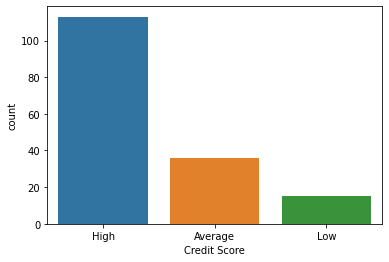

In [60]:
sns.countplot(x='Credit Score', data=df)
High = df['Credit Score'].value_counts()['High']
Average = df['Credit Score'].value_counts()['Average']
Low = df['Credit Score'].value_counts()['Low']
print("High:", High)
print("Average:", Average)
print("Low:", Low)
plt.show()

In [61]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [62]:
df.value_counts('Gender')

Gender
Female    86
Male      78
dtype: int64

In [63]:
df.value_counts(['Gender','Credit Score'])

Gender  Credit Score
Male    High            57
Female  High            56
Male    Average         21
Female  Average         15
        Low             15
dtype: int64

78
86


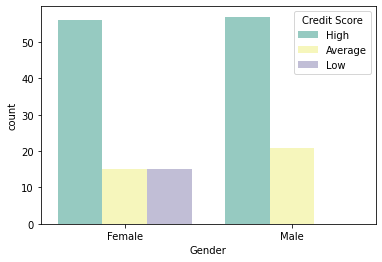

In [64]:
male= df[df.Gender == 'Male']["Credit Score"]
female = df[df.Gender == 'Female']["Credit Score"]
print(male.shape[0])
print(female.shape[0])

sns.countplot(x="Gender", hue="Credit Score", palette="Set3", data=df)
plt.show()

In [65]:
df['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [66]:
df.value_counts('Marital Status')

Marital Status
Married    87
Single     77
dtype: int64

In [67]:
df.groupby(['Credit Score', 'Marital Status'])['Marital Status'].count()

Credit Score  Marital Status
Average       Married            2
              Single            34
High          Married           85
              Single            28
Low           Single            15
Name: Marital Status, dtype: int64

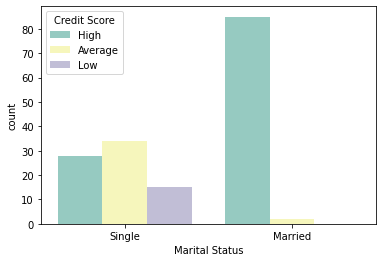

In [68]:
sns.countplot(x="Marital Status", hue="Credit Score", palette="Set3", data=df)
plt.show()

In [69]:
df['Number of Children'].unique()

array([0, 2, 1, 3], dtype=int64)

In [70]:
df.value_counts('Number of Children')

Number of Children
0    97
1    32
2    30
3     5
dtype: int64

In [71]:
df.groupby(['Credit Score', 'Number of Children'])['Number of Children'].count()

Credit Score  Number of Children
Average       0                     34
              1                      1
              2                      1
High          0                     48
              1                     31
              2                     29
              3                      5
Low           0                     15
Name: Number of Children, dtype: int64

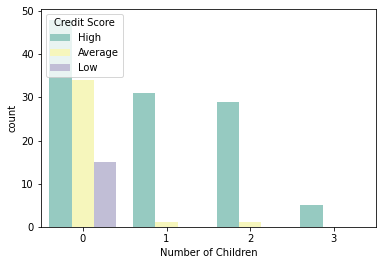

In [72]:
sns.countplot(x="Number of Children", hue="Credit Score", palette="Set3", data=df)
plt.show()

In [73]:
has_child_count = df[df['Number of Children'] > 0].shape[0]
no_child_count = df[df['Number of Children'] == 0].shape[0]

print('With Kid:', has_child_count)
print('Without Kid:', no_child_count)

With Kid: 67
Without Kid: 97


In [74]:
counts = df.groupby('Credit Score')['Number of Children'].sum()
total_counts = df['Credit Score'].value_counts()
survival_percentage = (counts / total_counts) * 100
for kid, percentage in survival_percentage.items():
    print(f'Number of Children {kid}: {percentage:.2f}%')

Number of Children Average: 8.33%
Number of Children High: 92.04%
Number of Children Low: 0.00%


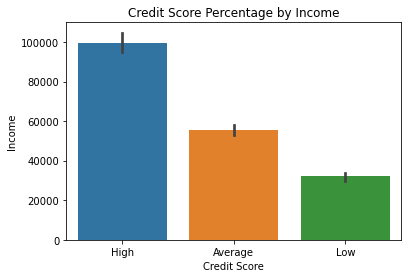

In [75]:
sns.barplot(x='Credit Score', y='Income', data=df)
plt.xlabel('Credit Score')
plt.ylabel('Income')
plt.title('Credit Score Percentage by Income')
plt.show()

In [76]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
print(df.head())

   Age  Gender  Income            Education Marital Status  \
0   25       1   50000    Bachelor's Degree         Single   
1   30       0  100000      Master's Degree        Married   
2   35       1   75000            Doctorate        Married   
3   40       0  125000  High School Diploma         Single   
4   45       1  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  


In [77]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [78]:
df['Education'] = df['Education'].map({"Bachelor's Degree": 1, "Master's Degree": 2, 'Doctorate':3, 'High School Diploma':4,  "Associate's Degree":5 })
print(df.head())

   Age  Gender  Income  Education Marital Status  Number of Children  \
0   25       1   50000          1         Single                   0   
1   30       0  100000          2        Married                   2   
2   35       1   75000          3        Married                   1   
3   40       0  125000          4         Single                   0   
4   45       1  100000          1        Married                   3   

  Home Ownership Credit Score  
0         Rented         High  
1          Owned         High  
2          Owned         High  
3          Owned         High  
4          Owned         High  


In [79]:
df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married': 1})
print(df.head())

   Age  Gender  Income  Education  Marital Status  Number of Children  \
0   25       1   50000          1               0                   0   
1   30       0  100000          2               1                   2   
2   35       1   75000          3               1                   1   
3   40       0  125000          4               0                   0   
4   45       1  100000          1               1                   3   

  Home Ownership Credit Score  
0         Rented         High  
1          Owned         High  
2          Owned         High  
3          Owned         High  
4          Owned         High  


In [80]:
df['Home Ownership'] = df['Home Ownership'].map({'Rented': 0, 'Owned': 1})
print(df.head())

   Age  Gender  Income  Education  Marital Status  Number of Children  \
0   25       1   50000          1               0                   0   
1   30       0  100000          2               1                   2   
2   35       1   75000          3               1                   1   
3   40       0  125000          4               0                   0   
4   45       1  100000          1               1                   3   

   Home Ownership Credit Score  
0               0         High  
1               1         High  
2               1         High  
3               1         High  
4               1         High  


In [81]:
df['Credit Score'] = df['Credit Score'].map({'High': 1, 'Average': 2, 'Low':3})
print(df.head())

   Age  Gender  Income  Education  Marital Status  Number of Children  \
0   25       1   50000          1               0                   0   
1   30       0  100000          2               1                   2   
2   35       1   75000          3               1                   1   
3   40       0  125000          4               0                   0   
4   45       1  100000          1               1                   3   

   Home Ownership  Credit Score  
0               0             1  
1               1             1  
2               1             1  
3               1             1  
4               1             1  


In [82]:
X = df[['Age','Gender','Income','Education','Marital Status','Number of Children','Home Ownership']]
y = df['Credit Score']

In [83]:
X.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,1,50000,1,0,0,0
1,30,0,100000,2,1,2,1
2,35,1,75000,3,1,1,1
3,40,0,125000,4,0,0,1
4,45,1,100000,1,1,3,1


In [84]:
X.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
159,29,1,27500,4,0,0,0
160,34,0,47500,5,0,0,0
161,39,1,62500,1,1,2,1
162,44,0,87500,2,0,0,1
163,49,1,77500,3,1,1,1


In [85]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit Score, dtype: int64

In [86]:
y.tail()

159    3
160    2
161    1
162    1
163    1
Name: Credit Score, dtype: int64

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 164 non-null    int64
 1   Gender              164 non-null    int64
 2   Income              164 non-null    int64
 3   Education           164 non-null    int64
 4   Marital Status      164 non-null    int64
 5   Number of Children  164 non-null    int64
 6   Home Ownership      164 non-null    int64
dtypes: int64(7)
memory usage: 9.1 KB


In [89]:
y.info()

AttributeError: 'Series' object has no attribute 'info'

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=1)

In [91]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(131, 7)
(131,)
(33, 7)
(33,)


In [92]:
#Perceptron

In [93]:
ppn = Perceptron(max_iter=200,eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=200, random_state=1)

In [94]:
y_pred_ppn = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_ppn).sum())

Misclassified examples: 13


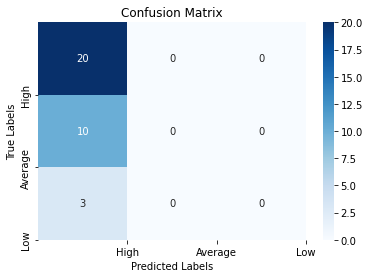

In [95]:
cm = confusion_matrix(y_test, y_pred_ppn)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[1, 2, 3], labels=['High', 'Average', 'Low'])
plt.yticks(ticks=[1, 2, 3], labels=['High', 'Average', 'Low'])

plt.show()

In [96]:
accuracy_ppn = accuracy_score(y_test, y_pred_ppn)
print(accuracy_ppn)

0.6060606060606061


In [97]:
report = classification_report(y_test, y_pred_ppn)
print(report)

              precision    recall  f1-score   support

           1       0.61      1.00      0.75        20
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         3

    accuracy                           0.61        33
   macro avg       0.20      0.33      0.25        33
weighted avg       0.37      0.61      0.46        33



D:\ProgramforCS\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramforCS\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramforCS\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
#Logistic Regression

In [99]:
LR_model = LogisticRegression(max_iter=200, random_state=1, solver='liblinear')
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=1, solver='liblinear')

In [100]:
y_pred_lr=LR_model.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_lr).sum())

Misclassified examples: 10


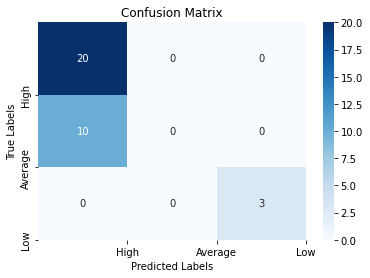

In [101]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[1, 2, 3], labels=['High', 'Average', 'Low'])
plt.yticks(ticks=[1, 2, 3], labels=['High', 'Average', 'Low'])

plt.show()

In [102]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)

0.696969696969697


In [103]:
report = classification_report(y_test, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           1       0.67      1.00      0.80        20
           2       0.00      0.00      0.00        10
           3       1.00      1.00      1.00         3

    accuracy                           0.70        33
   macro avg       0.56      0.67      0.60        33
weighted avg       0.49      0.70      0.58        33



D:\ProgramforCS\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramforCS\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramforCS\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
#Support Vector Machine

In [105]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [106]:
y_pred_svm=svm.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred_svm).sum())

Misclassified examples: 0


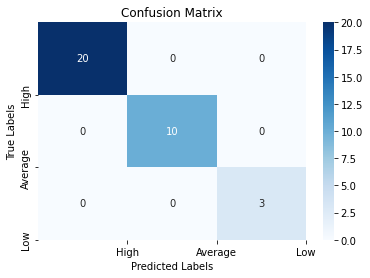

In [107]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[1, 2, 3], labels=['High', 'Average', 'Low'])
plt.yticks(ticks=[1, 2, 3], labels=['High', 'Average', 'Low'])

plt.show()

In [108]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)

1.0


In [109]:
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         3

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [110]:
#Model Evalution

In [111]:
from sklearn.metrics import mean_squared_error

rmse_ppn = np.sqrt(mean_squared_error(y_test, y_pred_ppn))
print("RMSE of Perceptron",rmse_ppn)
      
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE of Logistic Regression",rmse_lr)
      
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print("RMSE of SVM",rmse_svm)

RMSE of Perceptron 0.816496580927726
RMSE of Logistic Regression 0.5504818825631803
RMSE of SVM 0.0


In [112]:
accuracy = {"Perceptron":accuracy_ppn,"Logistic":accuracy_lr,"SVM":accuracy_svm}
rmse={"Perceptron":rmse_ppn,"Logistic":rmse_lr,"SVM":rmse_svm}

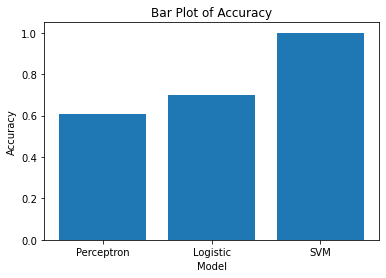

In [113]:
labels = list(accuracy.keys())
values = list(accuracy.values())

# Create a bar plot
plt.bar(labels, values)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Bar Plot of Accuracy')

# Show the plot
plt.show()

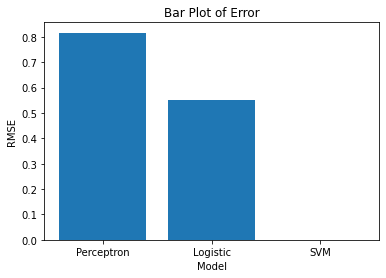

In [114]:
labels = list(rmse.keys())
values = list(rmse.values())

# Create a bar plot
plt.bar(labels, values)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Bar Plot of Error')

# Show the plot
plt.show()

In [115]:
import joblib

In [116]:
joblib_file = "model.pkl"  
joblib.dump(svm, joblib_file)

['model.pkl']